In [4]:
import keras
from keras.datasets import mnist
from keras import backend as K
import numpy as np
from matplotlib import pyplot as plt
# from sklearn.metrics import classification_report

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

num_classes = 10
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = keras.utils.to_categorical(y_test, num_classes)

In [6]:
#Handle Theano and Tensorflow data format
img_rows, img_cols = 28,28

print("Image data format: {}".format(K.image_data_format()))

if K.image_data_format() == 'channel_first':
    X_train = x_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Image data format: channels_last


In [7]:
model = keras.models.load_model('my_model.h5')
dropout_model = keras.models.load_model('permanent_dropout_model.h5')

In [8]:
#evaluate CNN
score = model.evaluate(X_test, y_test_one_hot, verbose=0)
print("Test loss: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))
score = dropout_model.evaluate(X_test, y_test_one_hot, verbose=0)
print("Test loss: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))
# print(X_test.shape)
# cnn_predictions = np.argmax(model.predict(X_test), axis=1)
# print(classification_report(y_test, cnn_predictions))

Test loss: 0.028256796755890535
Test accuracy: 0.9906
Test loss: 0.04403473533888755
Test accuracy: 0.9857


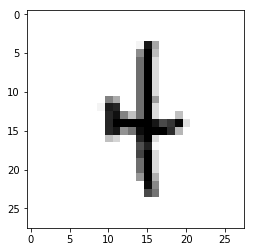

In [9]:
%matplotlib inline
plt.imshow(X_test[5720].reshape(28,28),cmap =plt.cm.gray_r, interpolation = "nearest")

In [10]:
test_img = np.expand_dims(X_test[5720],axis=0)
print(test_img.shape)
p1s = dropout_model.predict(test_img)[0]
p2s = model.predict(test_img)[0]
for p1, p2 in zip(p1s, p2s):
    print(np.round(p1, 4),np.round(p2, 4))
    print()

(1, 28, 28, 1)
0.0 0.0

0.0111 0.0091

0.0 1e-04

0.0 0.0

0.9889 0.9899

0.0 0.0002

0.0 1e-04

0.0 0.0002

0.0 0.0004

0.0 1e-04



(1, 10)
(1000, 1, 10)


<Container object of 10 artists>

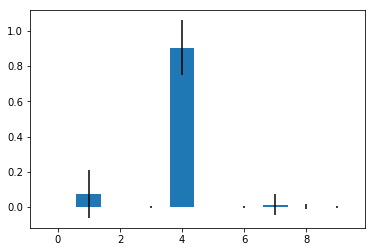

In [11]:
def predict_mean_and_var(X, T=1000, l=1):
    results = []
    for i in range(T):
        results.append(dropout_model.predict(X))
    results = np.array(results)
    means = np.mean(results, axis=0)
    std = np.std(results, axis=0)
    print(means.shape)
    print(results.shape)
    return means, std
mean, std = predict_mean_and_var(test_img)
plt.bar(np.arange(10), mean[0], yerr=std[0])